<a href="https://colab.research.google.com/github/adi0229/ML-DL/blob/master/spotify_2019_top50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 连接 google drive 网络硬盘

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


 使用 Pandas .xlsx 读取文件

In [0]:
import pandas as pd

DATASET_DIR = '/content/gdrive/My Drive/data/'

top_50 = pd.read_excel(DATASET_DIR + "spotify_2019_top50.xlsx", index_col=0)

预览表头前 5 行

In [12]:
top_50.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Seorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


查看表格的属性，一共 50 行，13 列，不含 NULL 空数据

In [73]:
top_50.shape

(50, 13)

In [13]:
top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


表格的列，包括了歌曲、艺术家及歌曲的属性（愉悦度、能量度、时长和流行度等）

In [94]:
top_50.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

# EDA数据探索问题


2019 年 Spotify 的Top50的歌曲 

- 快乐还是悲伤？歌曲的愉悦程度的分布是怎么样的？
- 歌曲的长度分布？
- 哪种类型的歌曲在榜单里更多？
- 哪个歌手2019在Spotify很火？

显而易见，这些 TOP50 的歌，在流行度数值上面，主要是 80-95

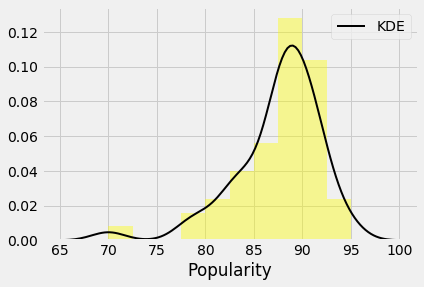

In [81]:
import numpy as np
from scipy import stats
import seaborn as sns

sns.distplot(top_50['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()


最受欢迎的 50 首歌，愉悦度的分布较为均匀，悲伤或快乐，都受听众们喜欢

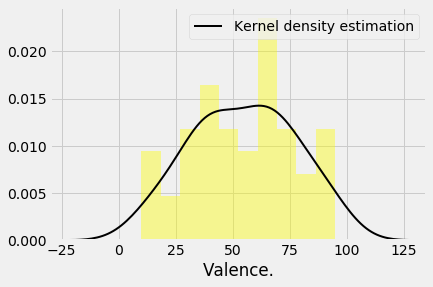

In [84]:
from matplotlib import pylab as plt
import numpy as np
from scipy import stats
import seaborn as sns

# plt.style.use('fivethirtyeight')
# plt.hist(top_50['Valence.'], bins=15,color = 'r')
# plt.xlabel("Valence")
# plt.ylabel("Count")
# plt.show()

sns.distplot(top_50['Valence.'],bins=10,kde=True,
             kde_kws={"color": "k", "lw": 2,
                      "label": "Kernel density estimation"},
             color='yellow')
plt.show()


总体而言，这 50 首歌的能力值偏高，60-90 较多

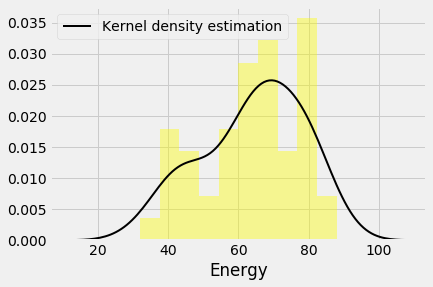

In [86]:
sns.distplot(top_50['Energy'],bins=10,kde=True,
             kde_kws={"color": "k", "lw": 2,
                      "label": "Kernel density estimation"},
             color='yellow')
plt.show()


总体而言，这 50 首歌的不长，150-225 秒居多，也就是2.5-3.7分钟左右

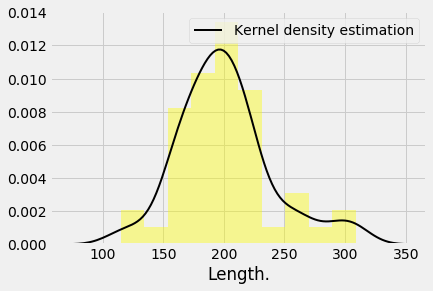

In [90]:
sns.distplot(top_50['Length.'],bins=10,kde=True,
             kde_kws={"color": "k", "lw": 2,
                      "label": "Kernel density estimation"},
             color='yellow')
plt.show()

In [30]:
top50_genres = top_50['Genre'].value_counts()
top50_genres

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
reggaeton           2
brostep             2
electropop          2
canadian pop        2
country rap         2
panamanian pop      2
dfw rap             2
reggaeton flow      2
australian pop      1
escape room         1
big room            1
boy band            1
r&b en espanol      1
pop house           1
trap music          1
atl hip hop         1
Name: Genre, dtype: int64

流行舞曲、流行、拉丁是最受欢迎的歌曲曲风

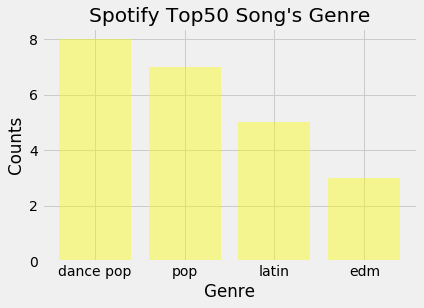

In [92]:
plt.bar(top50_genres[:4].index, top50_genres[:4], color = 'yellow',alpha=0.4, align =  'center') 
plt.title("Spotify Top50 Song's Genre") 
plt.ylabel('Counts') 
plt.xlabel('Genre') 
plt.show()

2019 Spotify“最炫”流行舞曲歌单

In [29]:
top_50[top_50.Genre == 'dance pop']['Track.Name']

3                         boyfriend (with Social House)
12                Loco Contigo (feat. J. Balvin & Tyga)
16                            No Guidance (feat. Drake)
32                                              7 rings
35                                    Never Really Over
40    fuck, i'm lonely (with Anne-Marie) - from 13 R...
42                                You Need To Calm Down
43                                              Shallow
Name: Track.Name, dtype: object

这 50 首歌，“可以跳舞的程度”也较高，集中在 60-90 之间

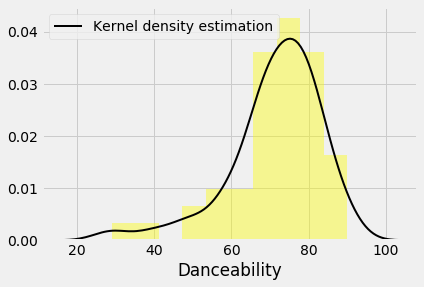

In [93]:
sns.distplot(top_50['Danceability'],bins=10,kde=True,
             kde_kws={"color": "k", "lw": 2,
                      "label": "Kernel density estimation"},
             color='yellow')

plt.show()

In [0]:
pop_artist = top_50.groupby('Artist.Name').size()

In [122]:
pop_artist

Artist.Name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALA              1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64

没有“一家独大”。
艺人 Ed Sheeran入榜的歌曲最多，4 首。
但是大多数艺人入榜的歌都差不多，2 首左右。

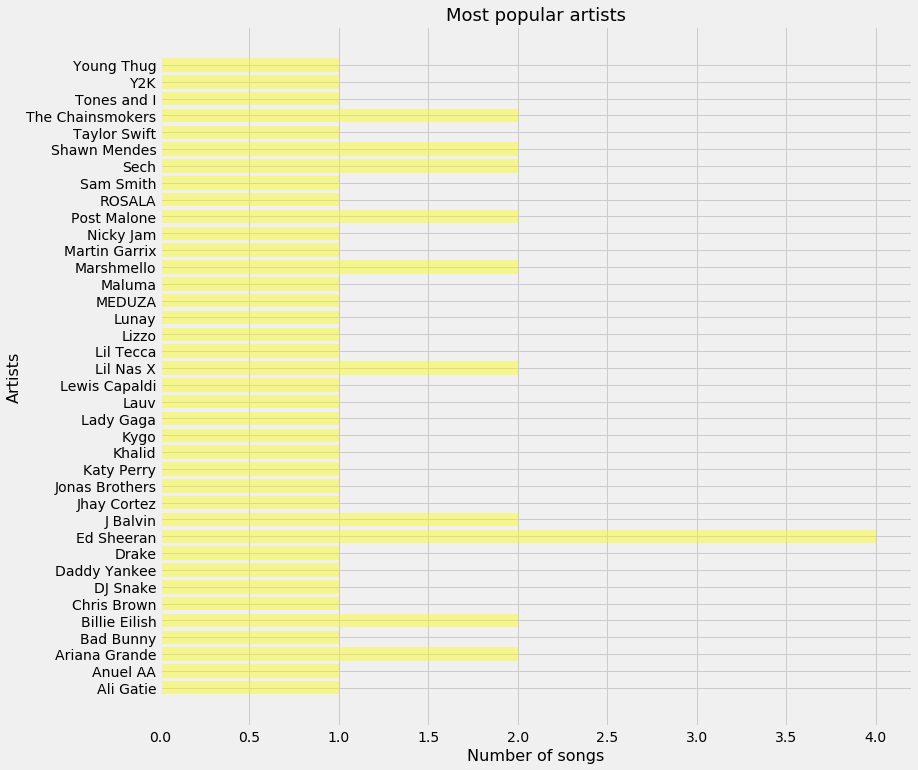

In [124]:
fig, ax=plt.subplots(figsize=(12,12))
plt.barh(np.arange(len(pop_artist)),pop_artist,color='yellow',alpha=0.4)
plt.yticks(np.arange(len(pop_artist)),pop_artist.index.tolist())
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=16)
plt.show()


Ed Sheeran的 4 首 2019 “金曲”

In [123]:
top_50[top_50['Artist.Name']=="Ed Sheeran"]

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
38,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


各个连续性数值之间的皮尔逊相关系数热图

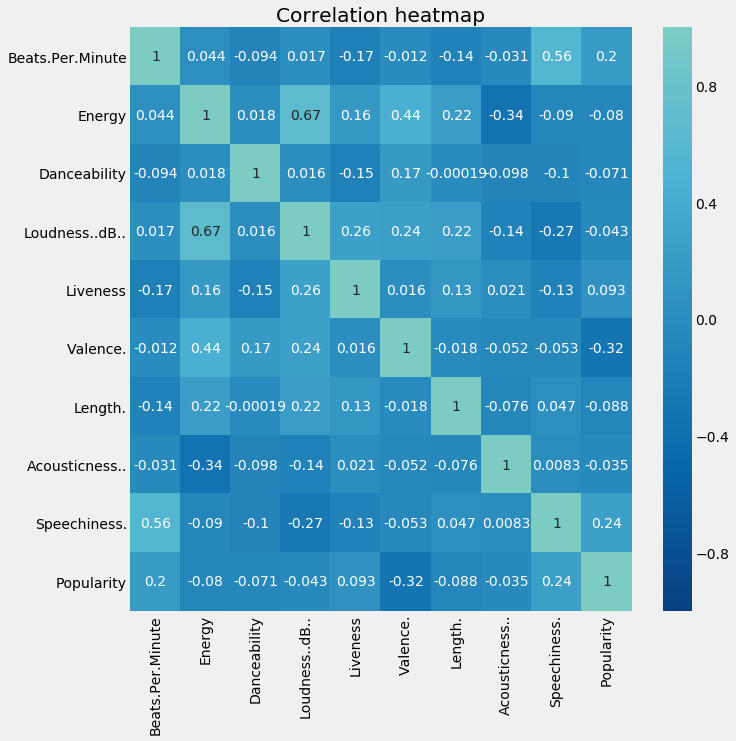

In [111]:
correlation=top_50.corr(method='pearson')

plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

愉悦度与能量值的相关关系（0.44）

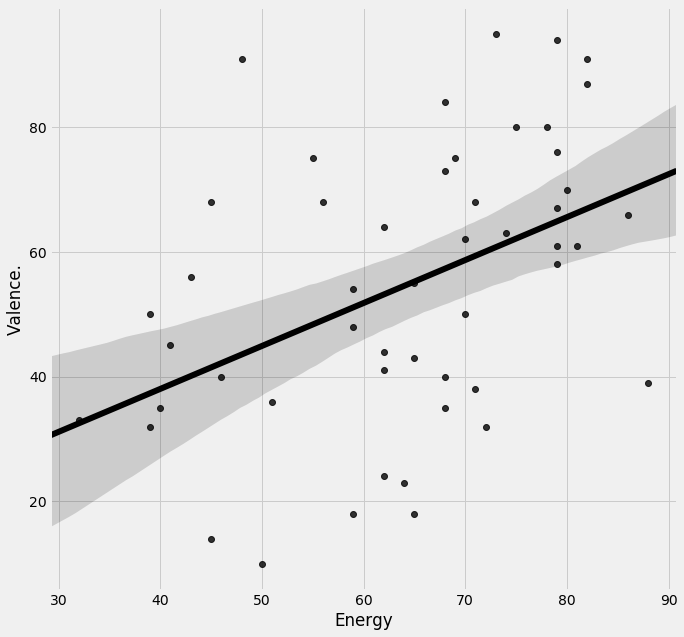

In [113]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Valence.',data=top_50,color='black')

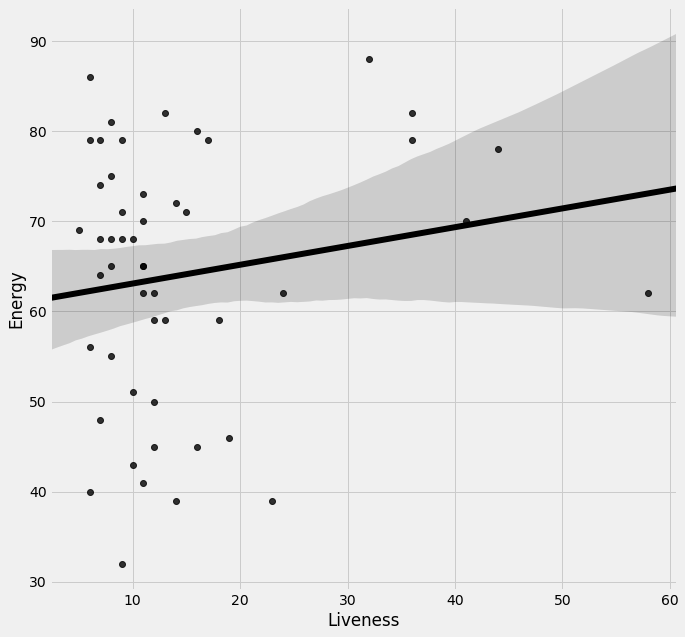

In [115]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Liveness',y='Energy',data=top_50,color='black')

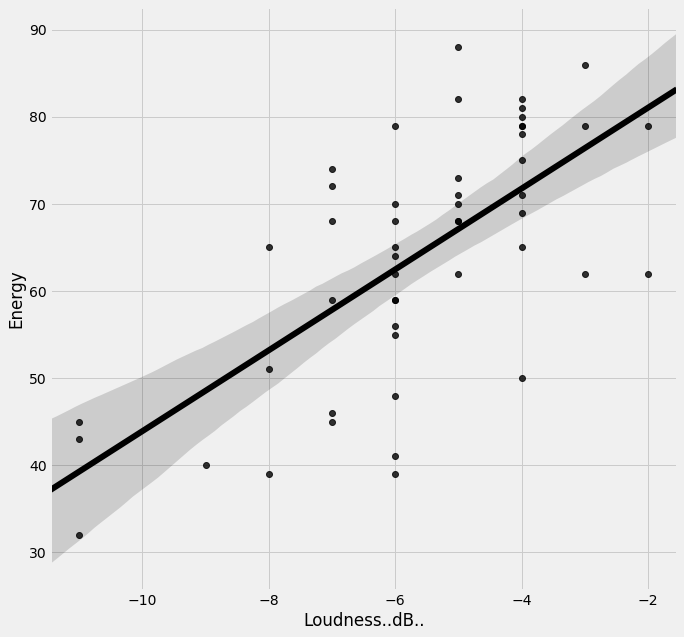

In [110]:
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Loudness..dB..',y='Energy',data=top_50,color='black')